# Финальный проект Control

### Загрузка данных

In [1]:
%pip install psycopg2-binary
#%pip install sqlalchemy
import psycopg2
import pandas as pd

df_user = pd.read_sql(
    """SELECT * FROM public.user_data""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

df_user.head()

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\Vera\\anaconda3\\Lib\\site-packages\\psycopg2\\_psycopg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.
  Using cached psycopg2_binary-2.9.3-cp39-cp39-win_amd64.whl (1.2 MB)


,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [2]:
df_post = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

df_post.head()


,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [3]:
#Процент таргета 1 в изначальной БД
#68686455/76892800=0.8932755082400433
#Следовательно, если всего берем 100000 записей, то с таргетом 0 - 89000

feed_data_1 = pd.read_sql(
    """SELECT * FROM public.feed_data WHERE action = 'view' and target=0 limit 2670000""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

feed_data_1.head()

,timestamp,user_id,post_id,action,target
0,2021-12-27 19:09:02,121754,3002,view,0
1,2021-12-27 19:11:34,121754,4913,view,0
2,2021-12-27 19:14:21,121754,3969,view,0
3,2021-12-27 19:15:46,121754,6347,view,0
4,2021-12-27 19:17:04,121754,3177,view,0


In [4]:
#Процент таргета 0 в изначальной БД
#8206345/76892800=0.10672449175995671
feed_data_2 = pd.read_sql(
    """SELECT * FROM public.feed_data WHERE action = 'view' and target=1 limit 330000""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

feed_data_2.head()

,timestamp,user_id,post_id,action,target
0,2021-10-10 12:19:25,162401,1871,view,1
1,2021-10-14 21:32:46,162401,305,view,1
2,2021-10-14 21:35:16,162401,3812,view,1
3,2021-10-14 22:08:32,162401,3577,view,1
4,2021-10-15 06:26:57,162401,2149,view,1


In [5]:
feed_data=pd.concat([feed_data_1, feed_data_2])
feed_data=feed_data.drop(["action"],axis=1)
feed_data.head()


,timestamp,user_id,post_id,target
0,2021-12-27 19:09:02,121754,3002,0
1,2021-12-27 19:11:34,121754,4913,0
2,2021-12-27 19:14:21,121754,3969,0
3,2021-12-27 19:15:46,121754,6347,0
4,2021-12-27 19:17:04,121754,3177,0


### TF-IDF

In [8]:
#%pip install nltk

In [6]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import string

from nltk.stem import WordNetLemmatizer 

wnl = WordNetLemmatizer()

def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = line.replace('\n\n', ' ').replace('\n', ' ')
    line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
    return line

vectorizer_tfidf=TfidfVectorizer(max_df=0.9,min_df=0.003,stop_words='english',preprocessor=preprocessing)
tfidf_matrix=vectorizer_tfidf.fit_transform(df_post['text'])

df_post['tfidf_score']=pd.DataFrame(tfidf_matrix.todense()).sum(axis=1)
df_post

C:\Users\Vera\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


,post_id,text,topic,tfidf_score
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.872924
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,10.590158
2,3,Asian quake hits European shares\n\nShares in ...,business,10.385080
3,4,India power shares jump on debut\n\nShares in ...,business,6.099789
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.071898
...,...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,5.785776
7019,7316,I give this movie 2 stars purely because of it...,movie,6.268396
7020,7317,I cant believe this film was allowed to be mad...,movie,5.236081
7021,7318,The version I saw of this film was the Blockbu...,movie,6.442907


In [8]:
df_meta=df_post

In [9]:
#Для обучения df_meta_without_topic без 'topic', a в загрузку на сервер df_meta
df_meta_without_text=df_meta.drop(['text'],axis=1)

In [10]:
df_meta_without_text.head()

,post_id,topic,tfidf_score
0,1,business,8.872924
1,2,business,10.590158
2,3,business,10.385080
3,4,business,6.099789
4,5,business,6.071898


In [11]:
df = pd.merge(
    feed_data,
    df_meta_without_text,
    on='post_id',
    how='left'
)
df.head()

,timestamp,user_id,post_id,target,topic,tfidf_score
0,2021-12-27 19:09:02,121754,3002,0,covid,2.828825
1,2021-12-27 19:11:34,121754,4913,0,movie,3.952801
2,2021-12-27 19:14:21,121754,3969,0,covid,2.716109
3,2021-12-27 19:15:46,121754,6347,0,movie,5.138108
4,2021-12-27 19:17:04,121754,3177,0,covid,3.077661


In [12]:
df_new = pd.merge(
    df,
    df_user,
    on='user_id',
    how='left'
)
df_new = df_new.set_index(['user_id', 'post_id'])
df_new.head()

timestamp  target  topic  tfidf_score  gender  age  \
user_id post_id                                                                
121754  3002    2021-12-27 19:09:02       0  covid     2.828825       0   16   
        4913    2021-12-27 19:11:34       0  movie     3.952801       0   16   
        3969    2021-12-27 19:14:21       0  covid     2.716109       0   16   
        6347    2021-12-27 19:15:46       0  movie     5.138108       0   16   
        3177    2021-12-27 19:17:04       0  covid     3.077661       0   16   

                    country        city  exp_group       os   source  
user_id post_id                                                       
121754  3002     Kazakhstan  Qaraghandy          2  Android  organic  
        4913     Kazakhstan  Qaraghandy          2  Android  organic  
        3969     Kazakhstan  Qaraghandy          2  Android  organic  
        6347     Kazakhstan  Qaraghandy          2  Android  organic  
        3177     Kazakhstan  Qaraghandy          2  Android  organic

In [13]:
#Добавим еще признаки
df_new['hour'] = pd.to_datetime(df_new['timestamp']).apply(lambda x: x.hour)
df_new['month'] = pd.to_datetime(df_new['timestamp']).apply(lambda x: x.month)
df_new.head()

timestamp  target  topic  tfidf_score  gender  age  \
user_id post_id                                                                
121754  3002    2021-12-27 19:09:02       0  covid     2.828825       0   16   
        4913    2021-12-27 19:11:34       0  movie     3.952801       0   16   
        3969    2021-12-27 19:14:21       0  covid     2.716109       0   16   
        6347    2021-12-27 19:15:46       0  movie     5.138108       0   16   
        3177    2021-12-27 19:17:04       0  covid     3.077661       0   16   

                    country        city  exp_group       os   source  hour  \
user_id post_id                                                              
121754  3002     Kazakhstan  Qaraghandy          2  Android  organic    19   
        4913     Kazakhstan  Qaraghandy          2  Android  organic    19   
        3969     Kazakhstan  Qaraghandy          2  Android  organic    19   
        6347     Kazakhstan  Qaraghandy          2  Android  organic    19   
        3177     Kazakhstan  Qaraghandy          2  Android  organic    19   

                 month  
user_id post_id         
121754  3002        12  
        4913        12  
        3969        12  
        6347        12  
        3177        12

In [15]:
max(df_new.timestamp), min(df_new.timestamp)

(Timestamp('2021-12-29 23:43:15'), Timestamp('2021-10-01 06:01:40'))

In [16]:
### За отсечку возьмем 2021-12-15

df_train = df_new[df_new.timestamp < '2021-12-15']
df_test = df_new[df_new.timestamp >= '2021-12-15']

df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape

((2506377,), (493623,))

## Catboost

In [47]:
#%pip install catboost

In [18]:
categorical_columns = [
    'topic', 'gender', 'country',
    'city', 'exp_group',
    'os', 'source','hour', 'month'
]#,'hour', 'month'

from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2)


catboost_model.fit(X_train, y_train,
                   categorical_columns    
             )

0:	learn: 0.3555261	total: 1.09s	remaining: 1m 48s
1:	learn: 0.3080176	total: 1.89s	remaining: 1m 32s
2:	learn: 0.2992922	total: 2.59s	remaining: 1m 23s
3:	learn: 0.2987690	total: 3.09s	remaining: 1m 14s
4:	learn: 0.2977576	total: 3.76s	remaining: 1m 11s
5:	learn: 0.2972661	total: 4.42s	remaining: 1m 9s
6:	learn: 0.2971682	total: 4.9s	remaining: 1m 5s
7:	learn: 0.2970606	total: 5.36s	remaining: 1m 1s
8:	learn: 0.2968730	total: 5.94s	remaining: 1m
9:	learn: 0.2966400	total: 6.47s	remaining: 58.2s
10:	learn: 0.2965269	total: 6.86s	remaining: 55.5s
11:	learn: 0.2963454	total: 7.29s	remaining: 53.5s
12:	learn: 0.2963130	total: 7.83s	remaining: 52.4s
13:	learn: 0.2961538	total: 8.37s	remaining: 51.4s
14:	learn: 0.2951418	total: 8.74s	remaining: 49.5s
15:	learn: 0.2949863	total: 9.1s	remaining: 47.8s
16:	learn: 0.2949666	total: 9.53s	remaining: 46.5s
17:	learn: 0.2948728	total: 9.97s	remaining: 45.4s
18:	learn: 0.2947535	total: 10.4s	remaining: 44.4s
19:	learn: 0.2946920	total: 10.9s	remaini

In [19]:
catboost_model.save_model('catboost_model_with_TDF+hour_month.cbm',
                           format="cbm")

In [20]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, catboost_model.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7429682671244975
Качество на тесте: 0.7291133139721039


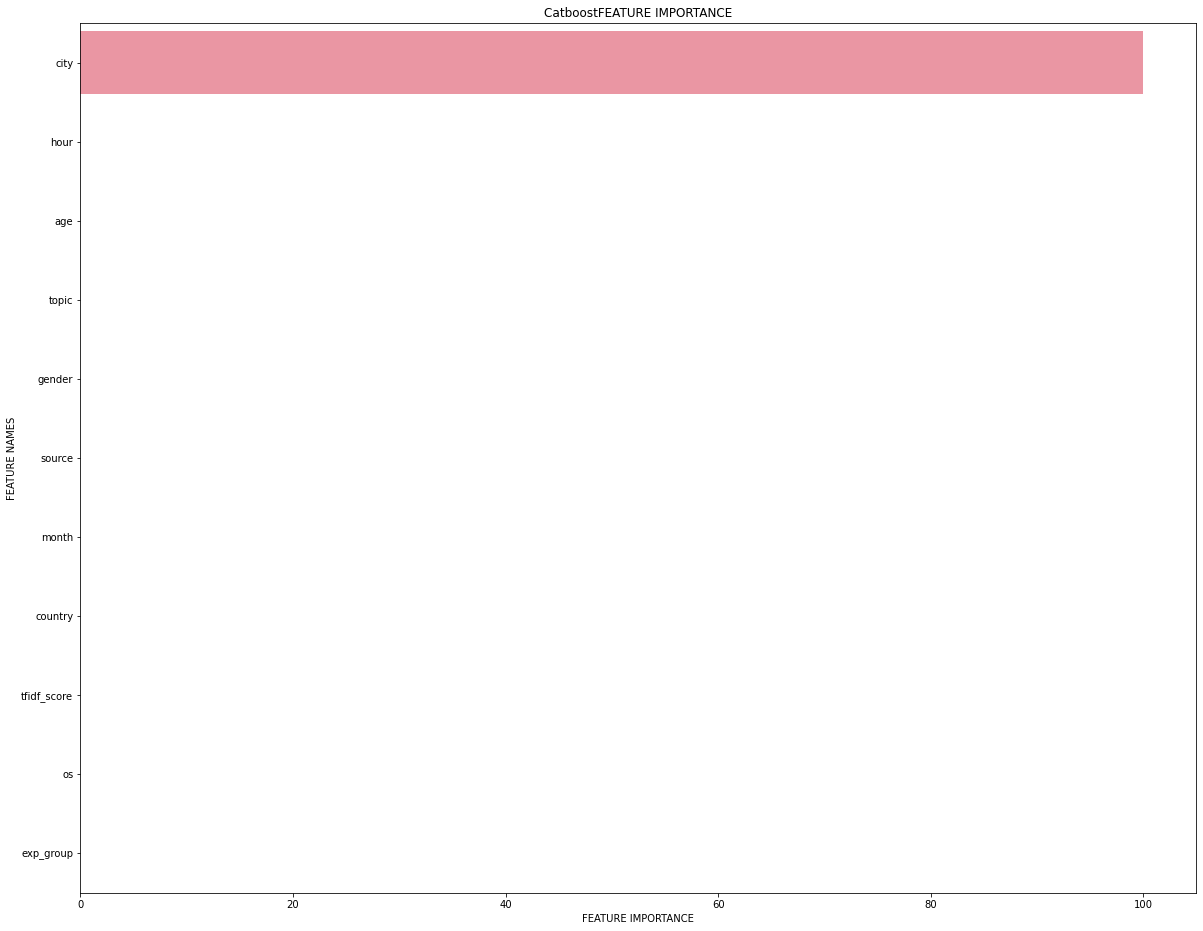

In [21]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(20,16))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost_model.feature_importances_,X_train.columns,'Catboost')

### Сохраняем полученные фичи в БД

In [22]:
import psycopg2
from sqlalchemy import create_engine

# Подключаемся к базе данных PGSQL
engine = create_engine("postgresql://robot-startml-ro:pheiph0hahj1Vaif@""postgres.lab.karpov.courses:6432/startml")

# Пишем в PGSQL
df_meta.to_sql('meta_control', con=engine, if_exists='replace')


23